In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [9]:
bank= pd.read_csv("C:/Users/Aboli/Downloads/bank-full.csv",sep=';')

In [10]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [11]:
bank.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [12]:
print(bank.shape)

(45211, 17)


In [15]:
print(list(bank.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


# barplot for y

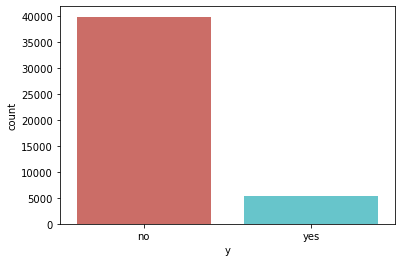

In [18]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [19]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Customer job distribution

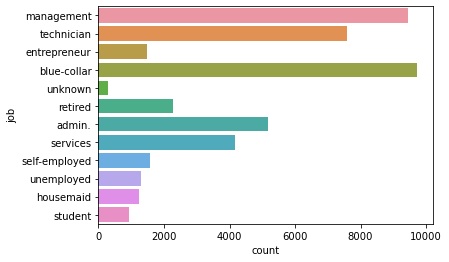

In [22]:
sns.countplot(y="job", data=data)
plt.show()

# Customer material satus distribution

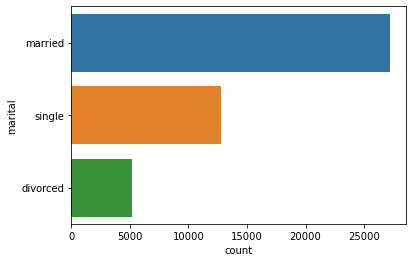

In [27]:
sns.countplot(y="marital", data=data)
plt.show()

# Credit in default

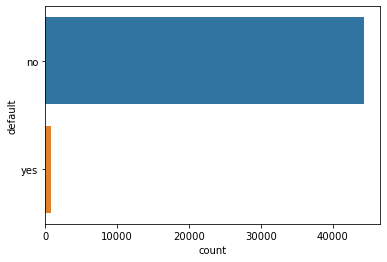

In [26]:
sns.countplot(y="default", data=bank)
plt.show()

# hosing loan

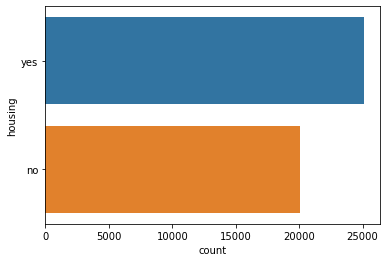

In [28]:
sns.countplot(y="housing", data=data)
plt.show()

# personal loan

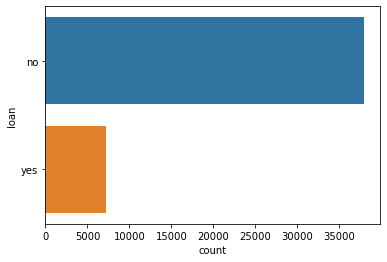

In [29]:
sns.countplot(y="loan", data=data)
plt.show()

# Barplot for previous marketing campaign outcome

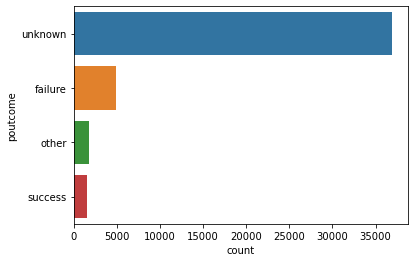

In [31]:
sns.countplot(y="poutcome", data=data)
plt.show()

In [32]:
bank.drop(bank.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 14,]], axis=1,)

,job,marital,default,balance,housing,poutcome,y
0,management,married,no,2143,yes,unknown,no
1,technician,single,no,29,yes,unknown,no
2,entrepreneur,married,no,2,yes,unknown,no
3,blue-collar,married,no,1506,yes,unknown,no
4,unknown,single,no,1,no,unknown,no
...,...,...,...,...,...,...,...
45206,technician,married,no,825,no,unknown,yes
45207,retired,divorced,no,1729,no,unknown,yes
45208,retired,married,no,5715,no,success,yes
45209,blue-collar,married,no,668,no,unknown,no


In [33]:
bank2 = pd.get_dummies(bank, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])


In [34]:
bank2

,age,education,balance,contact,day,month,duration,campaign,pdays,previous,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,tertiary,2143,unknown,5,may,261,1,-1,0,...,1,0,0,1,1,0,0,0,0,1
1,44,secondary,29,unknown,5,may,151,1,-1,0,...,1,0,0,1,1,0,0,0,0,1
2,33,secondary,2,unknown,5,may,76,1,-1,0,...,1,0,0,1,0,1,0,0,0,1
3,47,unknown,1506,unknown,5,may,92,1,-1,0,...,1,0,0,1,1,0,0,0,0,1
4,33,unknown,1,unknown,5,may,198,1,-1,0,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,825,cellular,17,nov,977,3,-1,0,...,1,0,1,0,1,0,0,0,0,1
45207,71,primary,1729,cellular,17,nov,456,2,-1,0,...,1,0,1,0,1,0,0,0,0,1
45208,72,secondary,5715,cellular,17,nov,1127,5,184,3,...,1,0,1,0,1,0,0,0,1,0
45209,57,secondary,668,telephone,17,nov,508,4,-1,0,...,1,0,1,0,1,0,0,0,0,1


In [36]:
bank2.drop(bank2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
bank2.columns


Index(['age', 'education', 'balance', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_self-employed', 'job_student',
       'job_technician', 'job_unknown', 'marital_divorced', 'marital_single',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

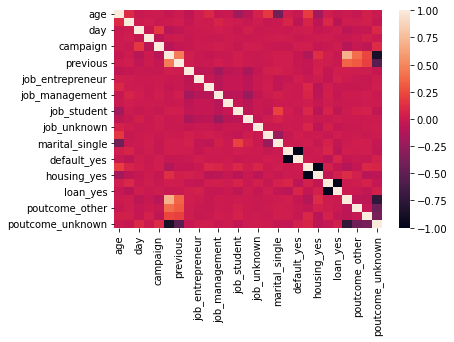

In [38]:
sns.heatmap(bank2.corr())
plt.show()

In [42]:
X = bank2.iloc[:,11:]
y = bank2.iloc[:,10]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [43]:
X_train.shape

(33908, 20)

In [44]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [45]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9852  126]
 [1107  218]]


In [46]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89
